# LSTM 

### Importing the module that scrapes the internet for the latest values count

In [291]:
import csv_updater

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from keras.preprocessing.sequence import TimeseriesGenerator

#### Getting the starter data from John Hopkin's CSV File

In [293]:
df = pd.read_csv("johnhopkins-3March.csv")

In [294]:
df = df.T

In [295]:
cols_drop = []
for i in range(114):
    if i != 0 and i != 5:
        cols_drop.append(i)
df.drop(df.columns[cols_drop], axis = 1, inplace = True) 

In [296]:
df.drop(['Country/Region', 'WHO region', 'Province/States'], inplace = True)

#### Cleaning the Data

In [297]:
df.head()

,0,5
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN


In [298]:
df.shape

(47, 2)

In [299]:
df.rename(columns = {0:'Infected', 5:'Deaths'}, inplace = True)

In [300]:
df.head()

,Infected,Deaths
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN


In [301]:
df.shape

(47, 2)

#### Using the dates as indices

In [302]:
dates_unix = []
start = 1579478400
for i in range(47):
    start += 86400
    dates_unix.append(start)

print(dates_unix)

[1579564800, 1579651200, 1579737600, 1579824000, 1579910400, 1579996800, 1580083200, 1580169600, 1580256000, 1580342400, 1580428800, 1580515200, 1580601600, 1580688000, 1580774400, 1580860800, 1580947200, 1581033600, 1581120000, 1581206400, 1581292800, 1581379200, 1581465600, 1581552000, 1581638400, 1581724800, 1581811200, 1581897600, 1581984000, 1582070400, 1582156800, 1582243200, 1582329600, 1582416000, 1582502400, 1582588800, 1582675200, 1582761600, 1582848000, 1582934400, 1583020800, 1583107200, 1583193600, 1583280000, 1583366400, 1583452800, 1583539200]


In [303]:
df['Date'] = dates_unix

In [304]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,1579564800
1/22/2020,314,NaN,1579651200
1/23/2020,581,NaN,1579737600
1/24/2020,846,NaN,1579824000
1/25/2020,1320,NaN,1579910400


In [305]:
df['Date'] = pd.to_datetime(df['Date'], unit='s')

In [306]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,2020-01-21
1/22/2020,314,NaN,2020-01-22
1/23/2020,581,NaN,2020-01-23
1/24/2020,846,NaN,2020-01-24
1/25/2020,1320,NaN,2020-01-25


In [307]:
df.set_index = df['Date']

In [308]:
df_dates = df['Date']

In [309]:
start

1583539200

In [310]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,2020-01-21
1/22/2020,314,NaN,2020-01-22
1/23/2020,581,NaN,2020-01-23
1/24/2020,846,NaN,2020-01-24
1/25/2020,1320,NaN,2020-01-25


In [311]:
df = df.reset_index(drop=True)

In [312]:
df.set_index("Date", inplace = True) 

In [313]:
df.head()

,Infected,Deaths
Date,,
2020-01-21,282,NaN
2020-01-22,314,NaN
2020-01-23,581,NaN
2020-01-24,846,NaN
2020-01-25,1320,NaN


In [314]:
df.fillna(0, inplace=True)

In [315]:
df.head()

,Infected,Deaths
Date,,
2020-01-21,282.0,0.0
2020-01-22,314.0,0.0
2020-01-23,581.0,0.0
2020-01-24,846.0,0.0
2020-01-25,1320.0,0.0


### Plotting the data

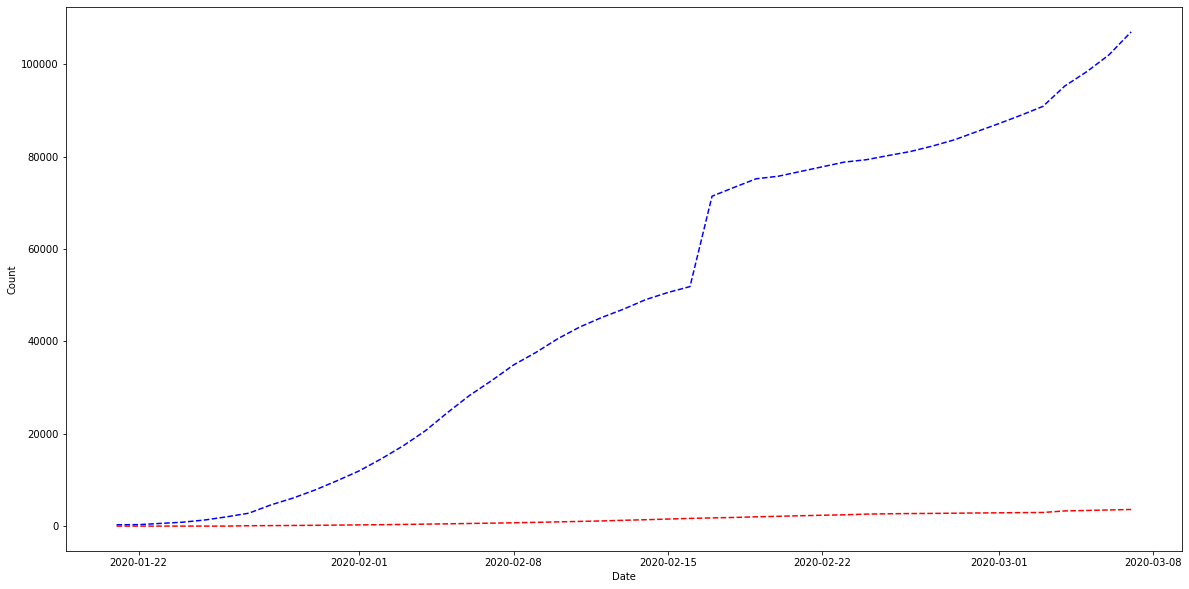

In [316]:
plt.figure(figsize=(20, 10))
plt.plot(df.Infected, 'b--')
plt.plot(df.Deaths, 'r--')
plt.ylabel("Count")
plt.xlabel("Date")
plt.show()

In [317]:
infected, deaths = csv_updater.get_nums()

In [318]:
import datetime
now = datetime.datetime.now()

In [319]:
currdate = now.strftime("%Y-%m-%d")

In [320]:
infected, deaths

(10781, 3661)

In [321]:
# currdate = '2020-03-06'
currdate = pd.to_datetime(currdate)

In [322]:
df.loc[currdate]= [infected, deaths]

In [323]:
df.tail(1)

,Infected,Deaths
Date,,
2020-03-08,10781.0,3661.0


In [324]:
if df.loc[currdate].any():
    print("Data already exists")    
else:
    df.loc[currdate] = [infected, deaths]

Data already exists


In [325]:
df.tail()

,Infected,Deaths
Date,,
2020-03-04,95310.0,3285.0
2020-03-05,98419.0,3387.0
2020-03-06,102044.0,3494.0
2020-03-07,106999.0,3599.0
2020-03-08,10781.0,3661.0


In [326]:
df.loc['2020-03-04'] = [95310,3285]

In [327]:
df.loc['2020-03-05'] = [98414,3387]

In [328]:
# df.drop(['2020-03-04','2020-03-05'], inplace=True)

### Exporting the well structured data

In [329]:
df.to_csv("StructuredDataset.csv")

In [330]:
df = pd.read_csv("StructuredDataset.csv")

In [331]:
df.set_index('Date', inplace = True)

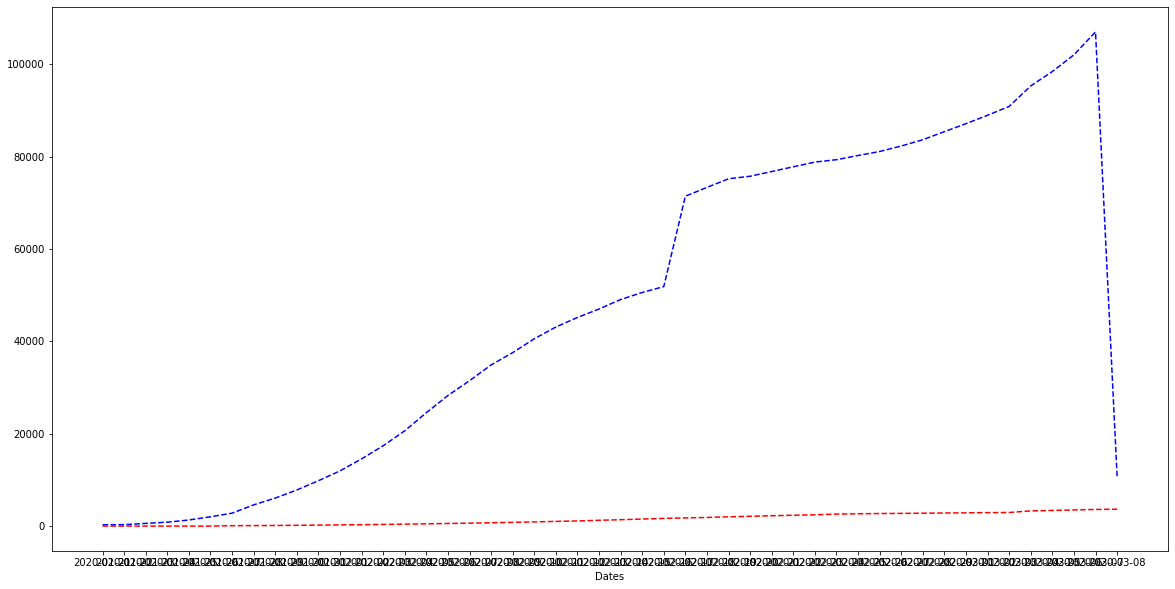

In [332]:
plt.figure(figsize=(20,10))
plt.plot(df.Infected, 'b--')
plt.plot(df.Deaths, 'r--')
plt.xlabel('Dates')
plt.show()

## LSTM

In [333]:
df

,Infected,Deaths
Date,,
2020-01-21,282.0,0.0
2020-01-22,314.0,0.0
2020-01-23,581.0,0.0
2020-01-24,846.0,0.0
2020-01-25,1320.0,0.0
2020-01-26,2014.0,0.0
2020-01-27,2798.0,80.0
2020-01-28,4593.0,106.0
2020-01-29,6065.0,132.0


In [334]:
df.drop("2020-03-08", inplace=True)

In [335]:
df

,Infected,Deaths
Date,,
2020-01-21,282.0,0.0
2020-01-22,314.0,0.0
2020-01-23,581.0,0.0
2020-01-24,846.0,0.0
2020-01-25,1320.0,0.0
2020-01-26,2014.0,0.0
2020-01-27,2798.0,80.0
2020-01-28,4593.0,106.0
2020-01-29,6065.0,132.0


In [336]:
df_inf = df.iloc[:,0]

In [337]:
df_inf['2020-01-21']

282.0

In [338]:
df_dea = df.iloc[:,1]

### Infected Predictions

In [339]:
df_inf = df_inf.values
df_inf = df_inf.reshape((-1,1))

In [340]:
split_percent = 0.80
split = int(split_percent*len(df_inf))

inf_train = df_inf[:split]
inf_test = df_inf[split:]

In [344]:
date_train = df[:split]
date_test = df['Date'][split:]

KeyError: 'Date'

In [341]:
look_back = 9

train_generator = TimeseriesGenerator(inf_train, inf_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(inf_test, inf_test, length=look_back, batch_size=1)

In [342]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
2/2 [==============================] - 1s 390ms/step - loss: 6263753289.1429
Epoch 2/25
2/2 [==============================] - 0s 54ms/step - loss: 6193951451.4286
Epoch 3/25
2/2 [==============================] - 0s 65ms/step - loss: 6139792676.5714
Epoch 4/25
2/2 [==============================] - 0s 58ms/step - loss: 6064526482.2857
Epoch 5/25
2/2 [==============================] - 0s 56ms/step - loss: 5971995501.7143
Epoch 6/25
2/2 [==============================] - 0s 67ms/step - loss: 5903429778.2857
Epoch 7/25
2/2 [==============================] - 0s 61ms/step - loss: 5853832923.4286
Epoch 8/25
2/2 [==============================] - 0s 68ms/step - loss: 5766013952.0000
Epoch 9/25
2/2 [==============================] - 0s 61ms/step - loss: 5718874697.1429
Epoch 10/25
2/2 [==============================] - 0s 55ms/step - loss: 5635529142.8571
Epoch 11/25
2/2 [==============================] - 0s 61ms/step - loss: 5573974893.7143
Epoch 12/25
2/2 [=======================

In [343]:
prediction = model.predict_generator(test_generator)

inf_train = inf_train.reshape((-1))
inf_test = inf_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

NameError: name 'go' is not defined